这是我跟随Coursera平台Deep Learning系列第4课卷积网络的笔记，方便以后查阅。

# 机器视觉(Computer vision)

随着神经网络的大量应用，特别是卷机网络的出现及应用，机器视觉领域在近几年突飞猛进。运用神经网络所能解决的机器视觉问题包括：
>1.图像分类（Image Classification）

>2.目标识别（Object Detection）

>3.风格迁移（Neural Style Transfer）

当然，在解决这些问题的过程中，还有很多问题有待思考，比如：
>图像过大，例如一张1000 * 1000像素的RGB图片就会有3000000个输入特征值，如果用传统的全连接网络（fully connected network），第一层用1000个神经元，权重矩阵W1就会是[1000,3000000]，这样会有太多的特征值有待确定，会给计算机的内存和处理器带来很大的挑战，所以设计一种能够降低维度的方法成为了我们的当务之急

在这种情况下，卷积网络就应运而生了

# 以边缘检测(Edge detection)为例

在一个神经网络中，我们可以说，前面的层(layer)可以检测到图像中的边缘，后面的层可以将这些边缘汇总来检测图像中目标物品的一部分，最后面的层再将这些部分汇总来检测整体的目标物品。

我们可以将这些边缘分为纵向边缘(vertical edge)和横向边缘(horizontal edge)。

## 纵向边缘

以一个6 x 6的灰度图像作为例子，经过一个3 x 3的过滤器(filter or kernel, or sometimes patch)，比如1、0、-1的三列适合于探测纵向边缘，会得到一个4 x 4的图像。在结果4 x 4图像中，中间亮度比较高的地方正是我们要找的纵向边缘。

这个过程就是我们所说的卷积，用过滤器3x3的数与图像中左上角的3x3的子矩阵进行矩阵逐元素相乘(element wise product)，结果再相加，得到矩阵中左上角的数。然后依次将过滤器在图像矩阵上平移得到完整的卷积结果。

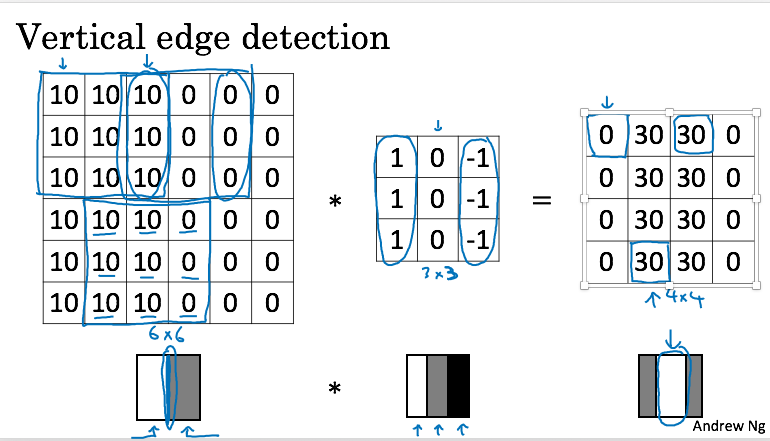

## 横向边缘
同样，我们可以用一个过滤器来探测图像中的横向边缘，但是我们要让过滤器旋转90度变成1、0、-1的三行。如果我们对另外一些方向上的边缘感兴趣的话，可以旋转对应的对数来改变过滤器的探测方向。

卷积的过程不改变。

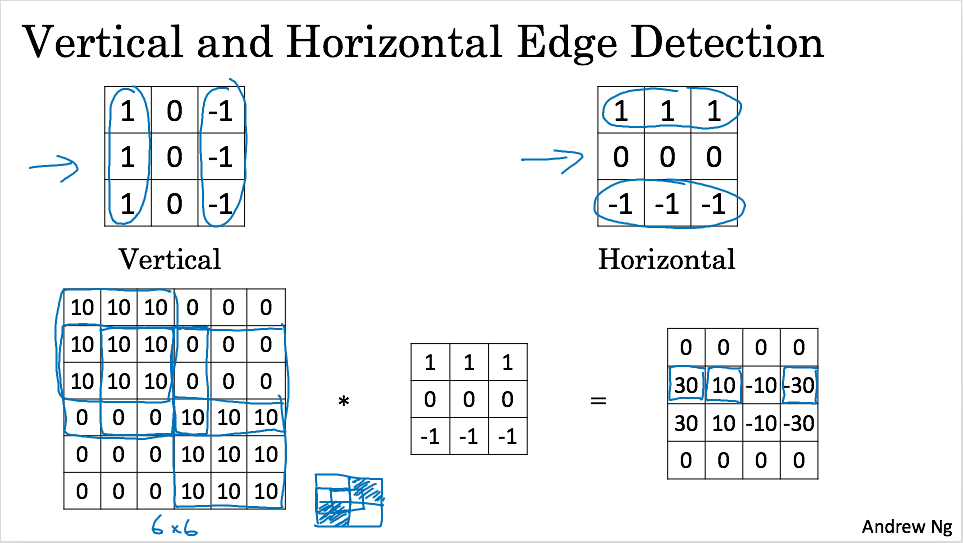

我们从上面的例子可以看出，1、0、-1可能并不是一个过滤器所能选择的最好的值，在这种情况下学者们研究出了另外一些别的过滤器，例如下图中所示的sobel滤波器和scharr滤波器。更为巧妙的是，其实我们可以把过滤器里的数值设置为可学习的特征值，从而达到人为难以确定的特定边缘探测的最优值，例如在这个3x3的过滤器里，我们设置9个参数分别为w1，w2，..，w9，然后利用和之前一样的正向传播和反向传播来训练并找出9个对应的数值。

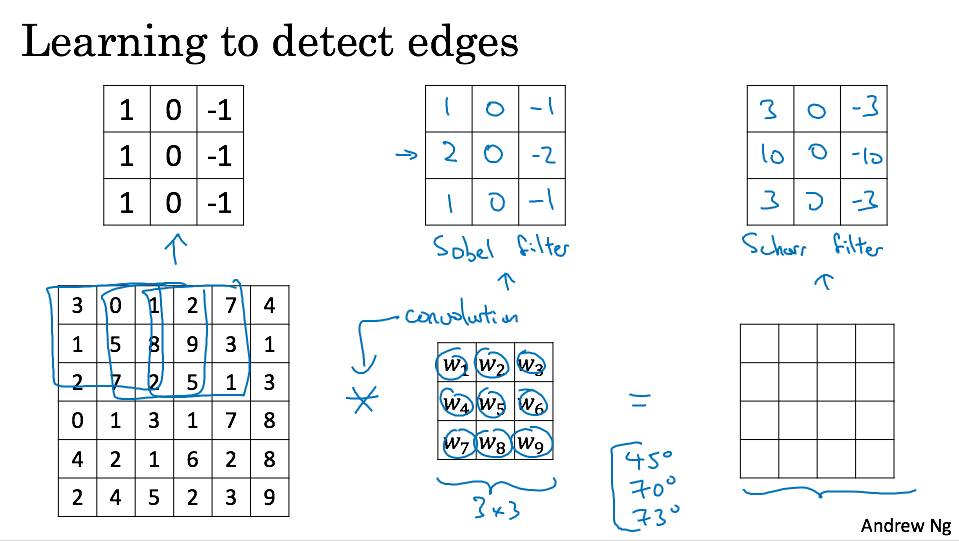

# 填充(Padding)
在上面卷积过程中，我们可以发现如果图像是n x n的矩阵，滤波器是f x f的矩阵，卷积后的矩阵则为(n-f+1) x (n-f+1)。结果相较于原图片缩小了，对于一些本身就比较小的原图片，这种卷积过程就会变得不合理。另外一个缺点是原图片中心的像素会比边缘处的像素得到更多的考虑，例如左上角的像素点只会影响一个数值，而中心的像素点会影响卷积结果矩阵中9个数值。为了减弱这两点影响，我们可以在图像轮廓周围填充，比如0，来维持图像的维度保持不变。这样，如果我们加入p层的填充，卷积后的矩阵将会为(n+2p-f+1) x (x+2p-f+1)。

基于填充的不同形式，我们可以将卷积分为两种：有效卷积和相同卷积。

## 有效卷积(Valid convolution)
不进行填充。如果图像是n x n的矩阵，滤波器是f x f的矩阵，卷积后的矩阵则为(n-f+1) x (n-f+1)。

## 相同卷积(Same convolution)
进行填充以保证卷积后的矩阵与卷积前的矩阵维度不变。

我们知道，如果我们加入p层的填充，卷积后的矩阵将会为(n+2p-f+1) x (n+2p-f+1)。所以p=(f-1)/2。f应该是一个奇数。

# 跨度卷积(Strided Convolution)

跨度(stride)，或者叫步幅，指的是在卷积过程中，每次将滤波器移动的像素数。之前我们一直将滤波器一个像素一个像素的平移，但是例如我们将跨度设置为2，当我们做完左上角的卷积运算后，我们会将滤波器向左平移2个像素，第一行的卷积完成后，纵向上也是一样的跨度。当然，我们也可以将纵向上的跨度和横向上的跨度设置为不一样的值，这可能更适用于非正方形的图像。

我们举个例子，在一张7x7 的图像上，我们继续使用一个3x3的滤波器，但是我们将跨度设为2，这时完成卷积后我们会有一个3x3的矩阵。

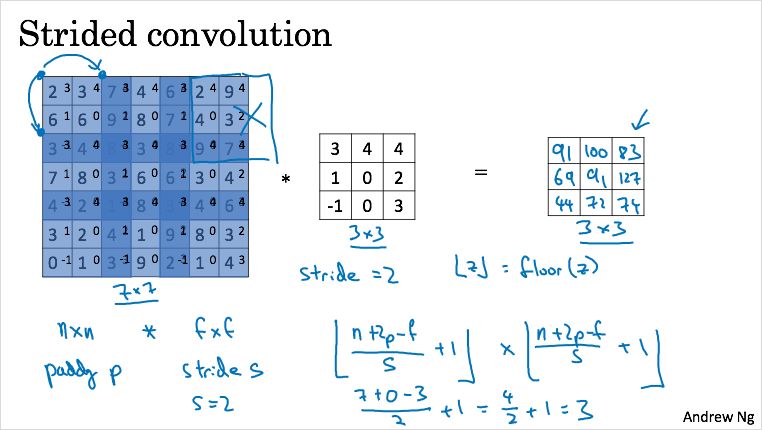

现在将结果如果图像是n x n的矩阵，滤波器是f x f的矩阵，加入p层的填充，跨度设为s，卷积后的矩阵的维度则为
$$ (\frac{n+2p-f}{s}+1) \times (\frac{n+2p-f}{s}+1)$$
在上面的例子中，n=7，f=3，p=0，s=2，所以结果为
$$ (\frac{7+0-3}{2}+1) =3$$
如果结果不是整数，我们就向下取整(floor)。

根据惯例(convention)，如果滤波器的范围超出了原图像的轮廓，我们不进行卷积运算。如上图右上角的情况。

在数学领域和信号处理领域，在卷积中进行元素相乘前要先把滤波器的元素通过x轴和y轴进行对称变换(flip)，不进行对称变换的通常称为协方差(cross correlation)。但是在深度学习中，我们没必要进行对称这一步，并且我们将它成为卷积(convolution)。
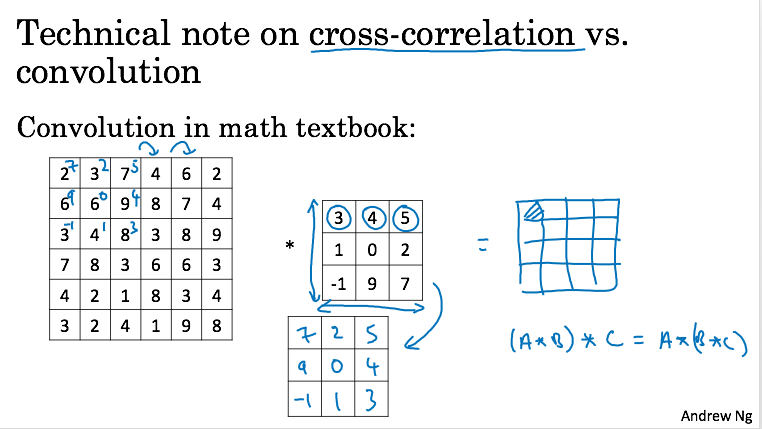

# 三维卷积(Convolution Over Volume)

我们见识到了在2维图像向上的卷积，但是只有灰度图像是2维的，我们平时见到的大多数彩色图像都是3维的，例如RGB图像除了长度宽度还有深度(depth)或者叫频道(channel)，RGB图像的深度为3，分别为红、绿、蓝，就是我们所说的RGB。

下面的例子中，我们就有一张6x6x3的RGB图像，我们将用3x3x3的滤波器来进行卷积过程，这样结果我们会得到一个4x4的矩阵。

如果我们只需要对特定颜色的频道的边缘进行检测，我们就可以在滤波器的第一层写入数值，第二层和第三层填入0，同样的道理也可以在其他层写入数值来应用于特定的颜色频道。

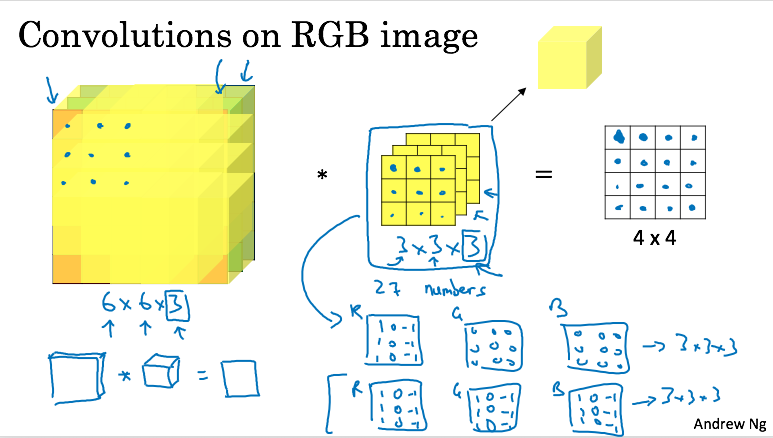

另外，但我们想要同时探测图像里不同类型的边缘，例如同时检测横向、纵向和45度的，我们也可以用不同的滤波器进行卷积，结果再累加。例如对下面6x6x3的图像同时进行横向和纵向的边缘检测，结果两个4x4的矩阵累加变成4x4x2的矩阵。可以总结为，
$$ n\times n\times n_c * f\times f\times n_c \to (n-f+1)\times (n-f+1)\times n_c\prime $$
$$ n_c\prime 是滤波器个数 $$ 

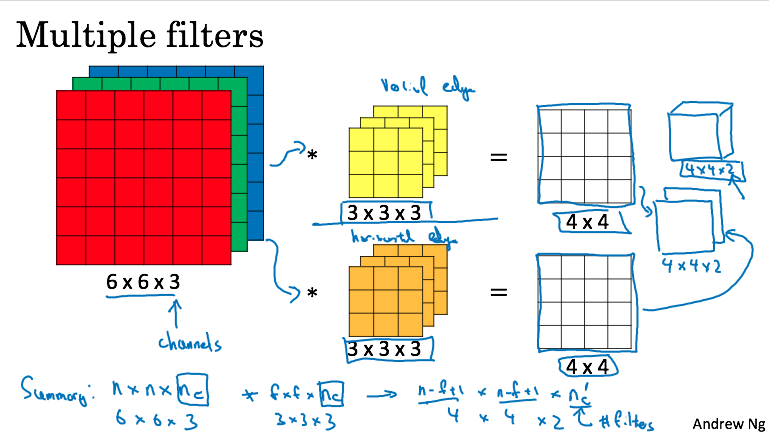

# 卷积网络的一层
我们看完了如何使用滤波器进行卷积运算，也知道了什么是填充和步长，现在就可以使用这些概念来构建卷机网络的一层。

从以前的学习中，我们知道神经网络的第一层通常表示为
$$ z^{[1]}=w^{[1]}a^{[0]}+b^{[1]}  ,其中 a^{[0]}=x $$
$$ a^{[1]}=g(z^{[1]}) ,其中g()为激发函数(activation function)$$

其中滤波器的参数就可以认为是$ w^{[1]} $。

类比全连接神经网络，在卷机网络中卷积后的结果，例如下图中的$ 4\times4矩阵 $就是$ w^{[1]}a^{[0]} $，加上一个偏差b(bias)就等于$ z^{[1]} $，通过一个激发函数ReLu后将不同滤波器的卷积累加后，我们就会有这一层的最后结果$ a^{[1]}$。

滤波器的个数决定最后结果的深度。

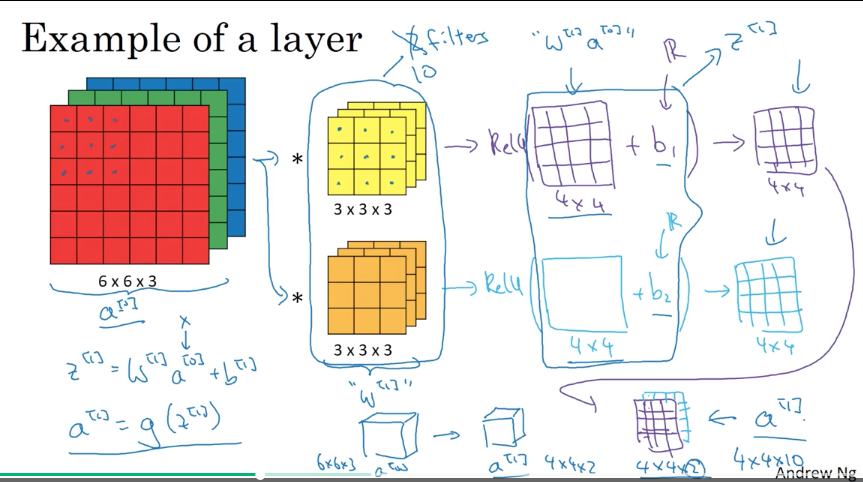

最后，所有卷及相关的维度总结在下图中，我就不再一一赘述
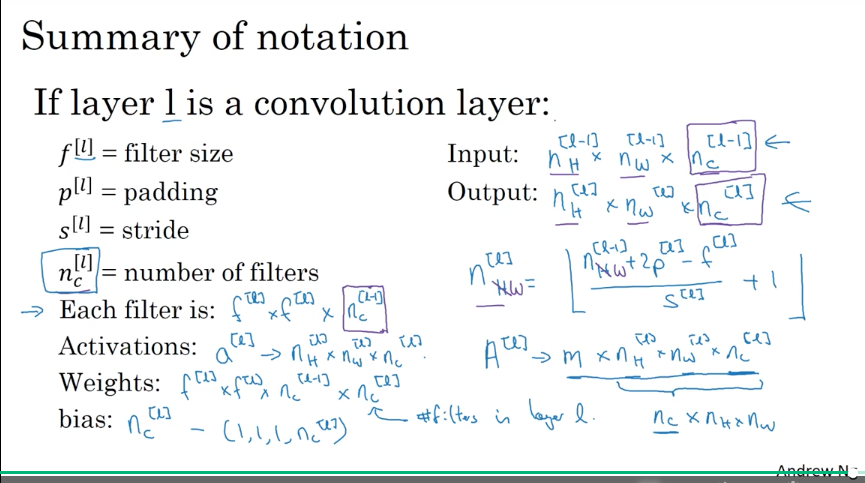

# 举例：一个简单的卷积网络

以一张$39\times39\times3$的图像来说，如果第一层里我们用10个$3\times3\times3$的滤波器，步幅设为1，填充设为0，我们的结果$a^{[1]}$就会是$37\times37\times10$的矩阵。

第二层里，我们用20个$5\times5$的滤波器，步幅设为2，填充设为0，结果为一个$17\times17\times20$的矩阵$a^{[2]}$。

第三层里，我们用40个$5\times5$的滤波器，步幅设为2，填充设为0，结果为一个$7\times7\times40$的矩阵$a^{[3]}$。

最后将这个$7\times7\times40=1960$的矩阵$a^{[3]}$通过logistic(识别单个目标)或者softmax(识别多个目标)，就会得到结果$ \hat{y}$。

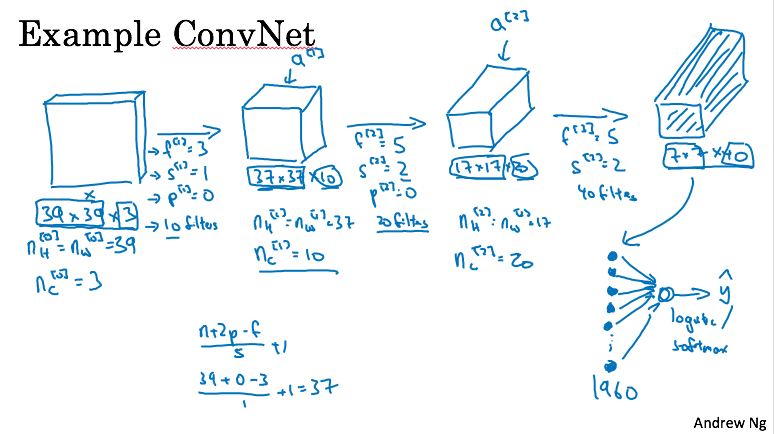

事实上，卷积网络里并不是只有一种卷积层，一个卷机网络中通常会有3种层：
> 1.卷积层(Convolution)

> 2.池化层(Pool)

> 3.全连接层(Fully connected)

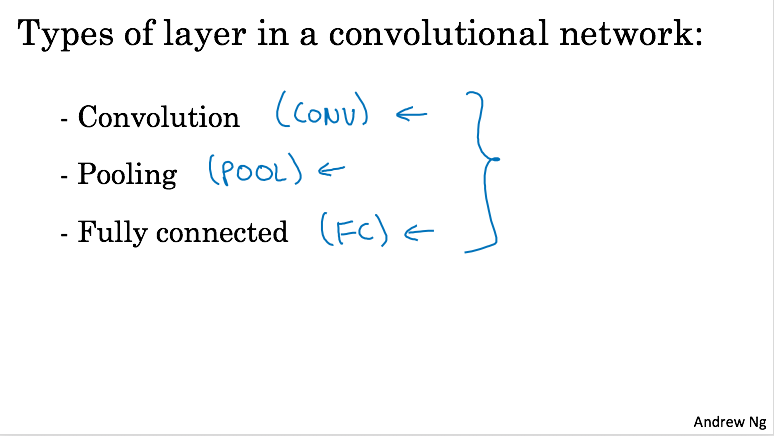

# 池化层(Pooling layer)
我们可以看到，在卷积层中所需要的特征值可能会非常的多，所以人们设计出了池化来减少特定层的特征值，已达到加速计算的目的。

## 最大池化(max pooling)
最大池化就是将矩阵分为不同的子矩阵，然后选择子矩阵中最大值，用这些最大值重构一个新的矩阵。
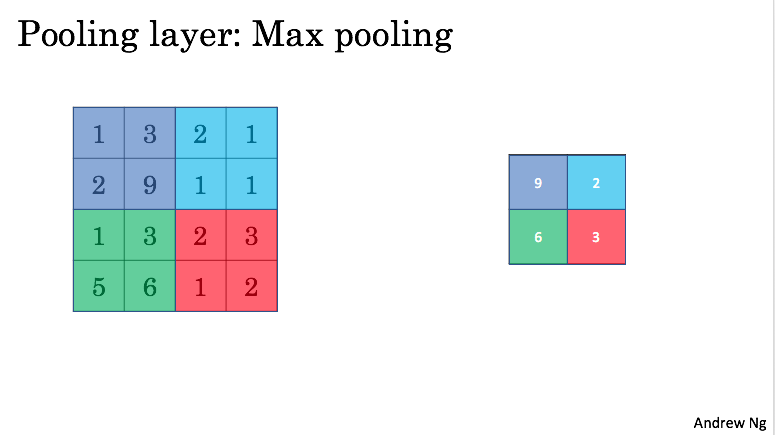

我们同样可以将分割矩阵的过程近似等同于一个滤波器在图像上平移，每次滤波器读出一个区域里最大的值。例如下面的例子，我们在一个$5\times5\times n_c$的图像，我们用一个$3\times3$的最大值滤波器，步幅设为1，就会得到一个$3\times3\times n_c$的矩阵，池化不会改变图像的深度。

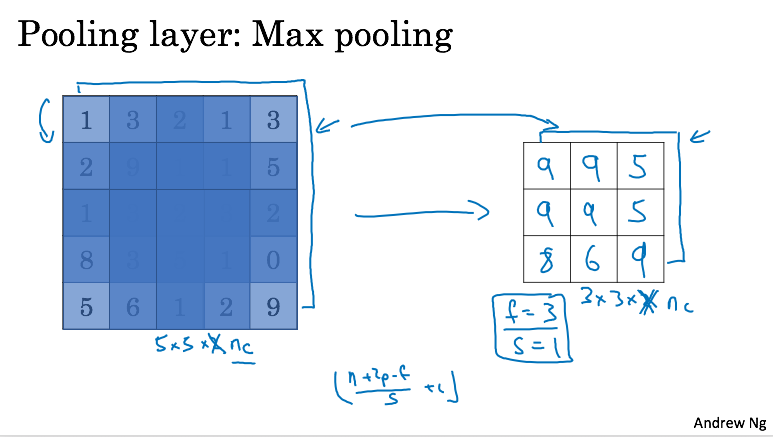

## 平均值池化(average pooling)
以同样的方法，如果我们找的是子矩阵上的平均值，就会得到平均值池化。

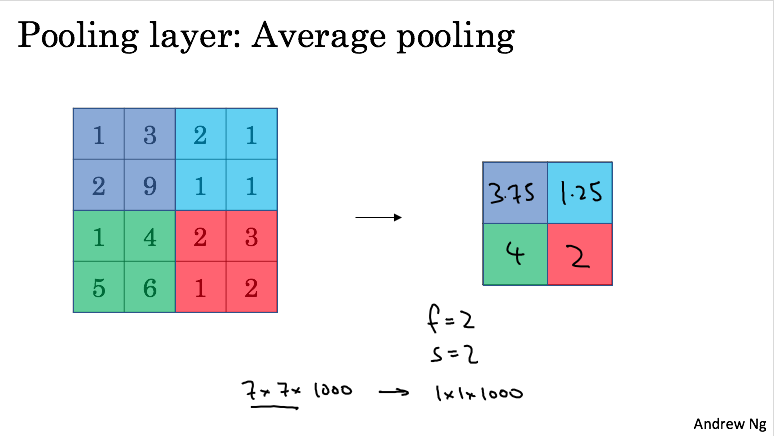

总之，在池化过程中，滤波器大小，步幅和滤波器种类(最大或平均)是可学习的超参数。经过池化，一个$n_H\times n_W\times n_C$的图像，经过维度f步幅s的池化滤波器，我们得到$\lfloor \frac{n_H-f}{s}+1\rfloor \times \lfloor \frac{n_W-f}{s}+1\rfloor \times n_C$的矩阵

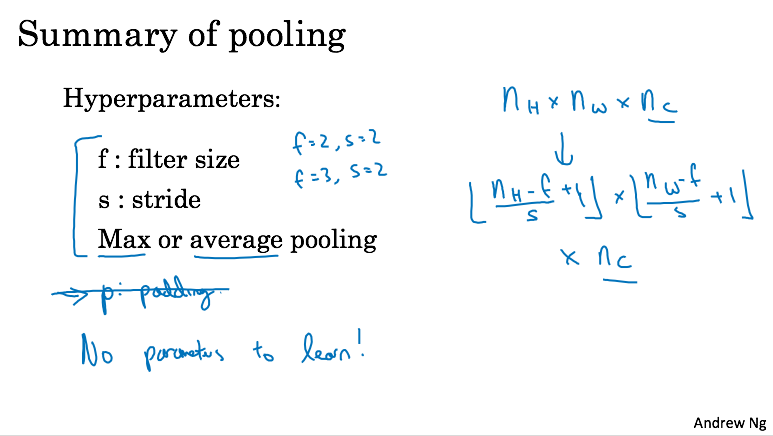

# 举例：一个完整的卷积网络
我们见识完了卷积网络里所有的基本构造，现在可以用这些概念来构造一个完整的卷积网络。以手写识别MNIST库为例，

输入是$32\times 32\times 3$的手写数字图像，$a^{[0]}=32\times 32\times 3$

第一层包括6个滤波器维度为5，步幅为1的卷积CONV1 $z^{[1]}=28\times 28\times 6$和滤波器维度为2，步幅为2的最大池化POOL1 $a^{[1]}=14\times 14\times 6$

第二层包括16个滤波器维度为5，步幅为1的卷积CONV2 $z^{[1]}=10\times 10\times 16$和滤波器维度为2，步幅为2的最大池化POOL2 $a^{[1]}=5\times 5\times 16$

我们可以看到，随着这些卷积层，图像在变小，但是深度在增加。我们将这个$5\times 5\times 16$展开(fatten)，就能得到一个$400\times 1$的矩阵

第三层是一个有120个神经元的全连接层FC3 $w^{[3]}=(120,400)$  $b^{[3]}=(120,1)$

第四层是一个有84个神经元的全连接层FC4 $w^{[4]}=(84,120)$  $b^{[4]}=(84,1)$

最后用softmax来识别从0到9的10个数字。

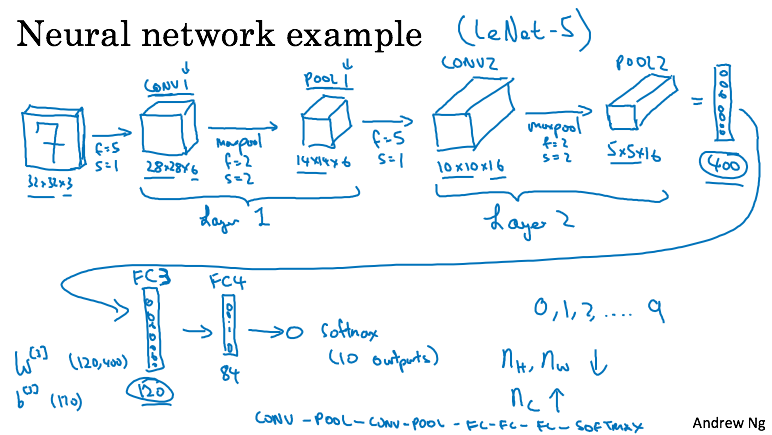

我们用下面这张表来总结在LeNet5卷机网络中每层的激发的大小以及特征的个数。

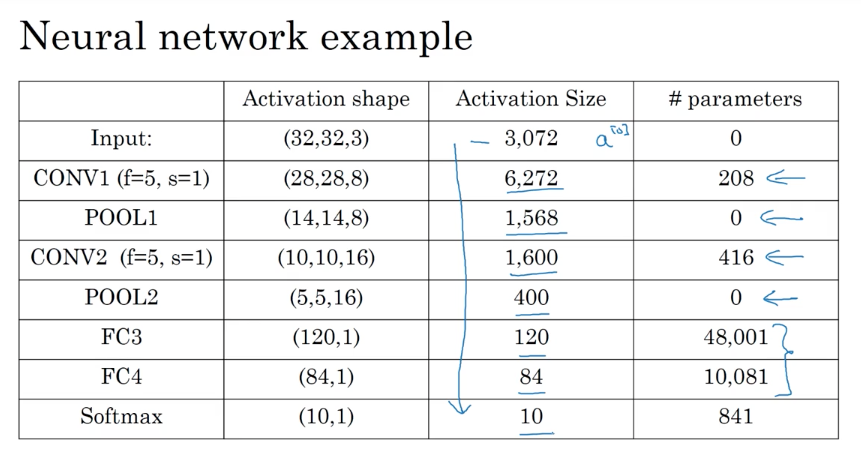

# 卷积网络的优势
最后，让我们来看看到底卷积网络比普通的深度网络有什么优势？为什么我们要选择卷积网络来进行图像识别？

下面以LeNet5的第一层来看，输入是$32\times 32\times 3$的矩阵，第一层卷积是$28\times 28\times 6$的矩阵，普通的全连接矩阵的参数w就会是$(3072,4704)$，大约有1千4百万参数，考虑到这只是很小的图片，如果是大图片，这会是一个很大的计算量。

但是在卷积网络中，$5\times 5$的滤波器参数，加上1个偏差，等于每个滤波器有26个参数，6个滤波器就只有156个参数。

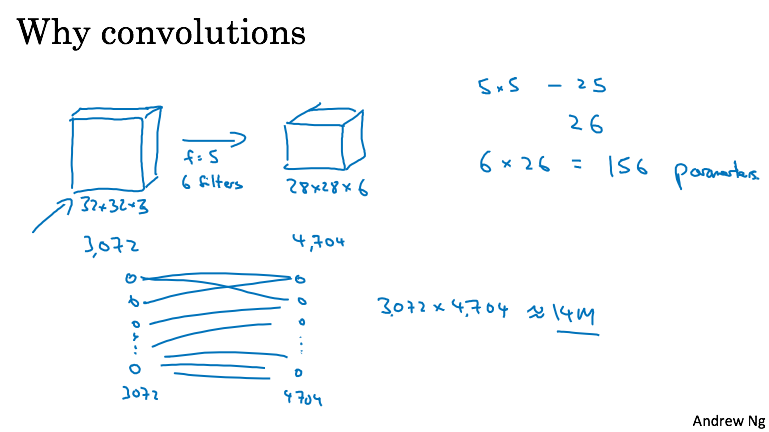

为什么卷积网络可以让参数保持在比较小的规模内？

1.权重分享(parameter sharing)：一个特征探测器(比如纵向边缘探测器)在图像的某一部分有用非常有可能在图像的另一部分也同样适用。

2.连接稀疏(sparsity of connections)：每一层的参数不是全部连接到一起，每一层的输出只取决于一小部分的输入。

这样，我们得以在图像中保持平移不变性(translation invariance)

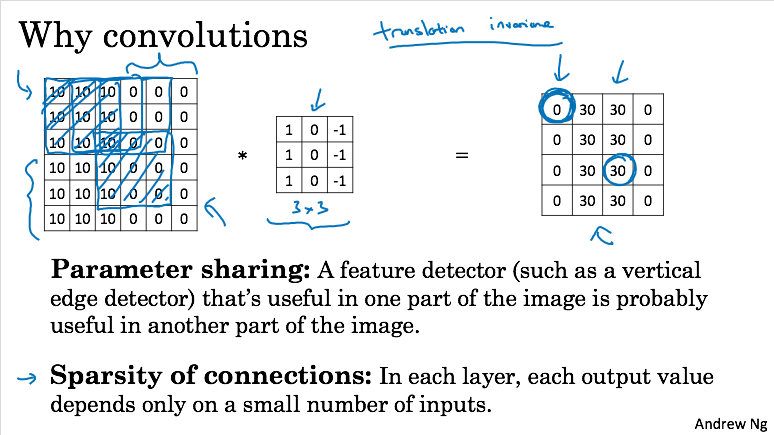

现在我们知道了卷积网络的构造方法，现在只需要选取合适的成本函数，然后用梯度下降的方法来逐步减少成本函数。

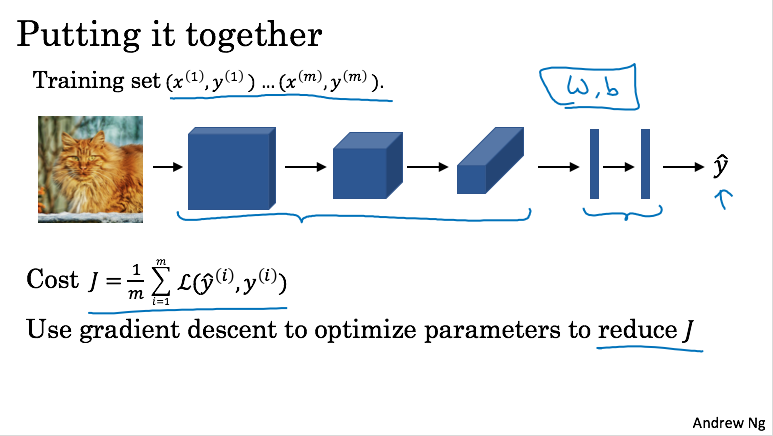